In [4]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 91% 60.0M/66.0M [00:00<00:00, 74.1MB/s]
100% 66.0M/66.0M [00:00<00:00, 112MB/s] 
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [5]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [6]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [7]:
def decision_tree_classification(X_tr,y_tr,X_ts,y_ts):
    AUCROC=[]
    mc=[]
    index=[]
    for i in range (20):
      index.append(i+1)
      dt_classifier = DecisionTreeClassifier(max_depth=i+1)
      dt_classifier.fit(X_tr, y_tr)
      y_pred = dt_classifier.predict(X_ts)
      #performances
      print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
      print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
      print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
      print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
      print('metrique personnalisée (MP): {}'.format(metric(y_ts,y_pred)))
      print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
      sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
      plt.title('Matrice de confusion', y=1.1, fontsize = 22)
      plt.xlabel('Prédit',fontsize = 18)
      plt.ylabel('Réel',fontsize = 18)
      plt.show()
      #sauvegarde de résultat
      AUCROC.append(roc_auc_score(y_ts , y_pred))
      mc.append(metric(y_ts,y_pred))
    #affichage
    plt.scatter(index,AUCROC,c='red')
    plt.scatter(index,mc,c='blue')


------------------------------ Arbre de décision ------------------------------
Precision : 0.73684
Recall : 0.69307
F1 : 0.71429
roc_auc_score : 0.84631
metrique personnalisée (MP): 0.7804829016510523
\\Matrice de confusion ///:- 
 [[56836    25]
 [   31    70]]


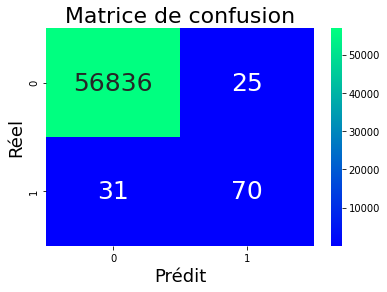

Precision : 0.81522
Recall : 0.74257
F1 : 0.77720
roc_auc_score : 0.87114
metrique personnalisée (MP): 0.8159087869542746
\\Matrice de confusion ///:- 
 [[56844    17]
 [   26    75]]


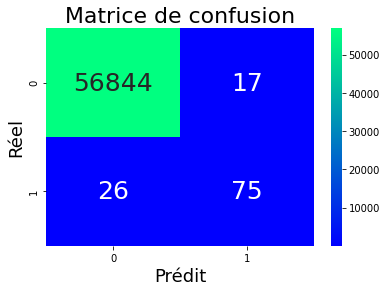

Precision : 0.80000
Recall : 0.75248
F1 : 0.77551
roc_auc_score : 0.87607
metrique personnalisée (MP): 0.8229759068640365
\\Matrice de confusion ///:- 
 [[56842    19]
 [   25    76]]


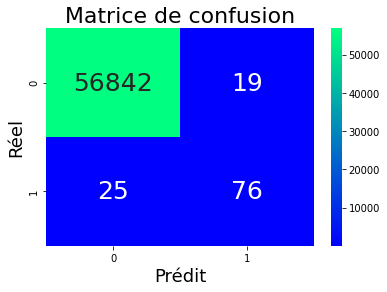

Precision : 0.86170
Recall : 0.80198
F1 : 0.83077
roc_auc_score : 0.90088
metrique personnalisée (MP): 0.8583917604167686
\\Matrice de confusion ///:- 
 [[56848    13]
 [   20    81]]


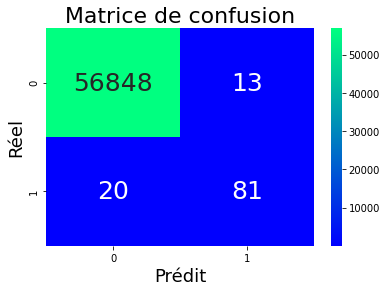

Precision : 0.84536
Recall : 0.81188
F1 : 0.82828
roc_auc_score : 0.90581
metrique personnalisée (MP): 0.8654588803265304
\\Matrice de confusion ///:- 
 [[56846    15]
 [   19    82]]


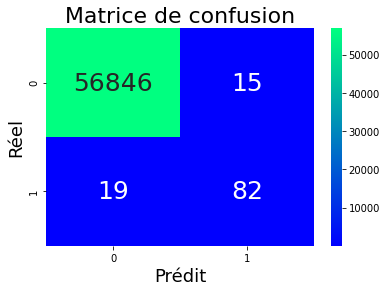

Precision : 0.85567
Recall : 0.82178
F1 : 0.83838
roc_auc_score : 0.91077
metrique personnalisée (MP): 0.8725410478620279
\\Matrice de confusion ///:- 
 [[56847    14]
 [   18    83]]


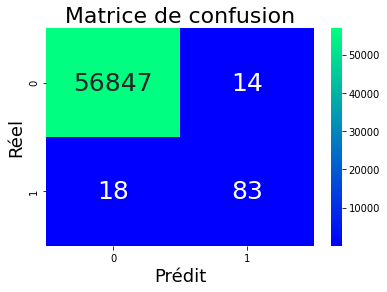

Precision : 0.89655
Recall : 0.77228
F1 : 0.82979
roc_auc_score : 0.88606
metrique personnalisée (MP): 0.8371803689369924
\\Matrice de confusion ///:- 
 [[56852     9]
 [   23    78]]


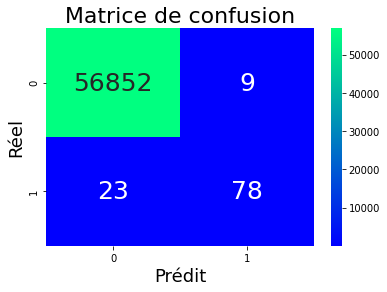

Precision : 0.88764
Recall : 0.78218
F1 : 0.83158
roc_auc_score : 0.89100
metrique personnalisée (MP): 0.8442525047219995
\\Matrice de confusion ///:- 
 [[56851    10]
 [   22    79]]


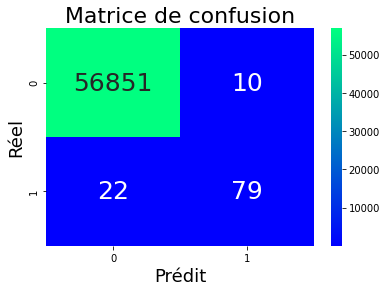

Precision : 0.93103
Recall : 0.80198
F1 : 0.86170
roc_auc_score : 0.90094
metrique personnalisée (MP): 0.8584268715434847
\\Matrice de confusion ///:- 
 [[56855     6]
 [   20    81]]


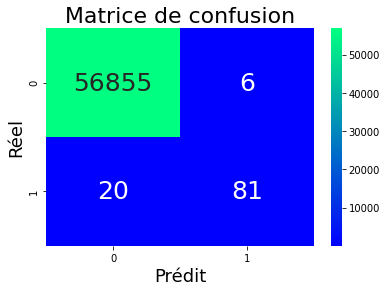

Precision : 0.89773
Recall : 0.78218
F1 : 0.83598
roc_auc_score : 0.89101
metrique personnalisée (MP): 0.8442575205972448
\\Matrice de confusion ///:- 
 [[56852     9]
 [   22    79]]


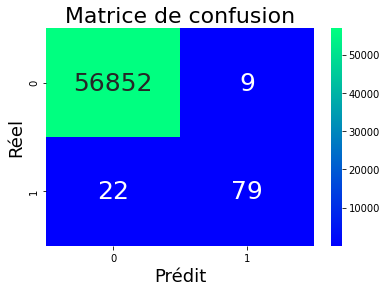

Precision : 0.88172
Recall : 0.81188
F1 : 0.84536
roc_auc_score : 0.90584
metrique personnalisée (MP): 0.8654789438275111
\\Matrice de confusion ///:- 
 [[56850    11]
 [   19    82]]


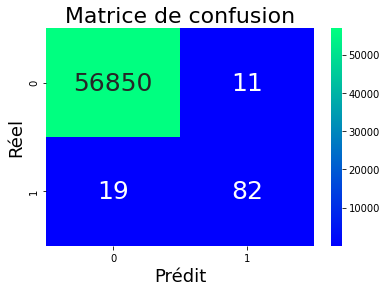

Precision : 0.87912
Recall : 0.79208
F1 : 0.83333
roc_auc_score : 0.89594
metrique personnalisée (MP): 0.8513246405070066
\\Matrice de confusion ///:- 
 [[56850    11]
 [   21    80]]


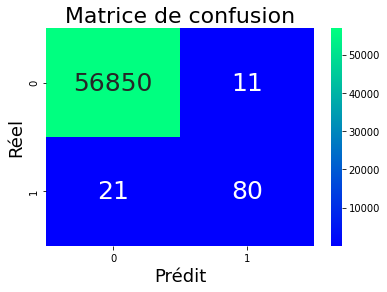

Precision : 0.78571
Recall : 0.76238
F1 : 0.77387
roc_auc_score : 0.88100
metrique personnalisée (MP): 0.8300430267737984
\\Matrice de confusion ///:- 
 [[56840    21]
 [   24    77]]


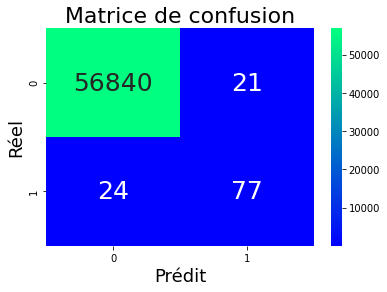

Precision : 0.79167
Recall : 0.75248
F1 : 0.77157
roc_auc_score : 0.87606
metrique personnalisée (MP): 0.8229708909887913
\\Matrice de confusion ///:- 
 [[56841    20]
 [   25    76]]


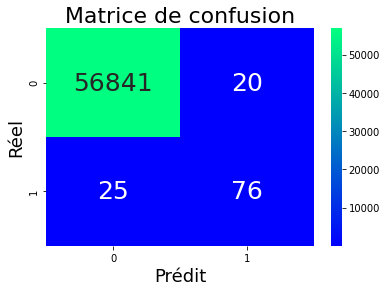

Precision : 0.81000
Recall : 0.80198
F1 : 0.80597
roc_auc_score : 0.90082
metrique personnalisée (MP): 0.8583616651652977
\\Matrice de confusion ///:- 
 [[56842    19]
 [   20    81]]


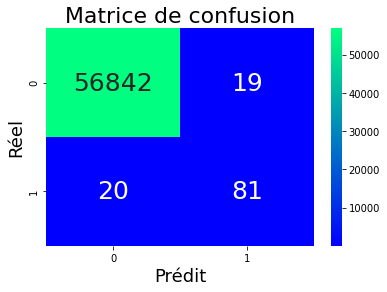

Precision : 0.78000
Recall : 0.77228
F1 : 0.77612
roc_auc_score : 0.88595
metrique personnalisée (MP): 0.8371151625588055
\\Matrice de confusion ///:- 
 [[56839    22]
 [   23    78]]


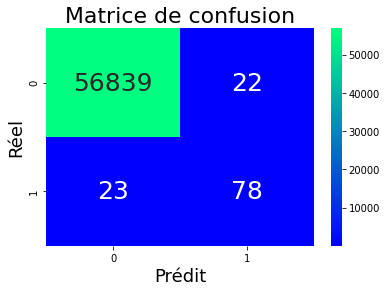

Precision : 0.77143
Recall : 0.80198
F1 : 0.78641
roc_auc_score : 0.90078
metrique personnalisée (MP): 0.8583365857890719
\\Matrice de confusion ///:- 
 [[56837    24]
 [   20    81]]


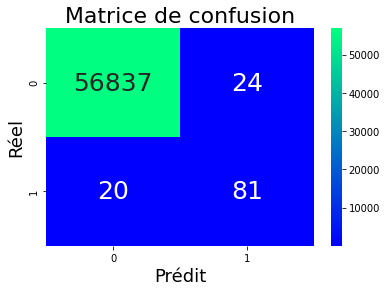

Precision : 0.79000
Recall : 0.78218
F1 : 0.78607
roc_auc_score : 0.89090
metrique personnalisée (MP): 0.844197330094303
\\Matrice de confusion ///:- 
 [[56840    21]
 [   22    79]]


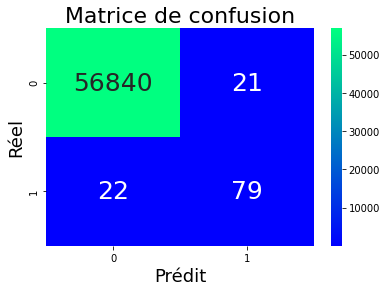

Precision : 0.77670
Recall : 0.79208
F1 : 0.78431
roc_auc_score : 0.89584
metrique personnalisée (MP): 0.8512644500040648
\\Matrice de confusion ///:- 
 [[56838    23]
 [   21    80]]


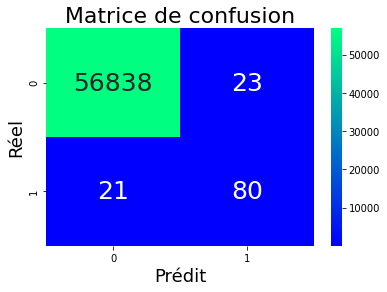

Precision : 0.80612
Recall : 0.78218
F1 : 0.79397
roc_auc_score : 0.89092
metrique personnalisée (MP): 0.8442073618447932
\\Matrice de confusion ///:- 
 [[56842    19]
 [   22    79]]


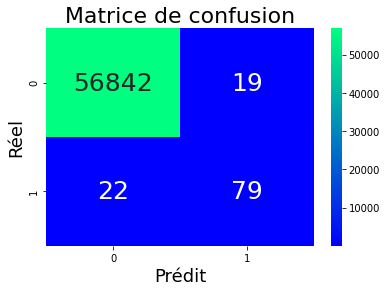

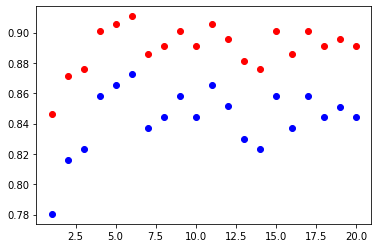

In [8]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1) #données
y = df['Class'] #classe

#découpage du dataset 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#DT 
print("-"*30,"Arbre de décision",30*"-")
decision_tree_classification(X_train,Y_train,X_test,Y_test)


In [11]:
#decision Tree prof=5
def decision_tree_classification_opti(X_tr,y_tr,X_ts,y_ts):
      dt_classifier = DecisionTreeClassifier(max_depth=5)
      dt_classifier.fit(X_tr, y_tr)
      y_pred = dt_classifier.predict(X_ts)
      #performances
      print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
      print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
      print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
      print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
      print('metrique personnalisée (MP): {}'.format(metric(y_ts,y_pred)))
      print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
      sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
      plt.title('Matrice de confusion', y=1.1, fontsize = 22)
      plt.xlabel('Prédit',fontsize = 18)
      plt.ylabel('Réel',fontsize = 18)
      plt.show()


Precision : 0.84536
Recall : 0.81188
F1 : 0.82828
roc_auc_score : 0.90581
metrique personnalisée (MP): 0.8654588803265304
\\Matrice de confusion ///:- 
 [[56846    15]
 [   19    82]]


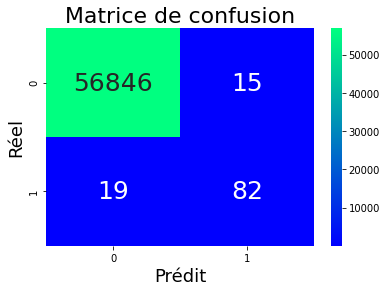

In [12]:
#decision Tree prof=5
decision_tree_classification_opti(X_train,Y_train,X_test,Y_test)
